# Exploratory Data Analysis of India's Gaseous Emissions and the Impact on Air Quality.
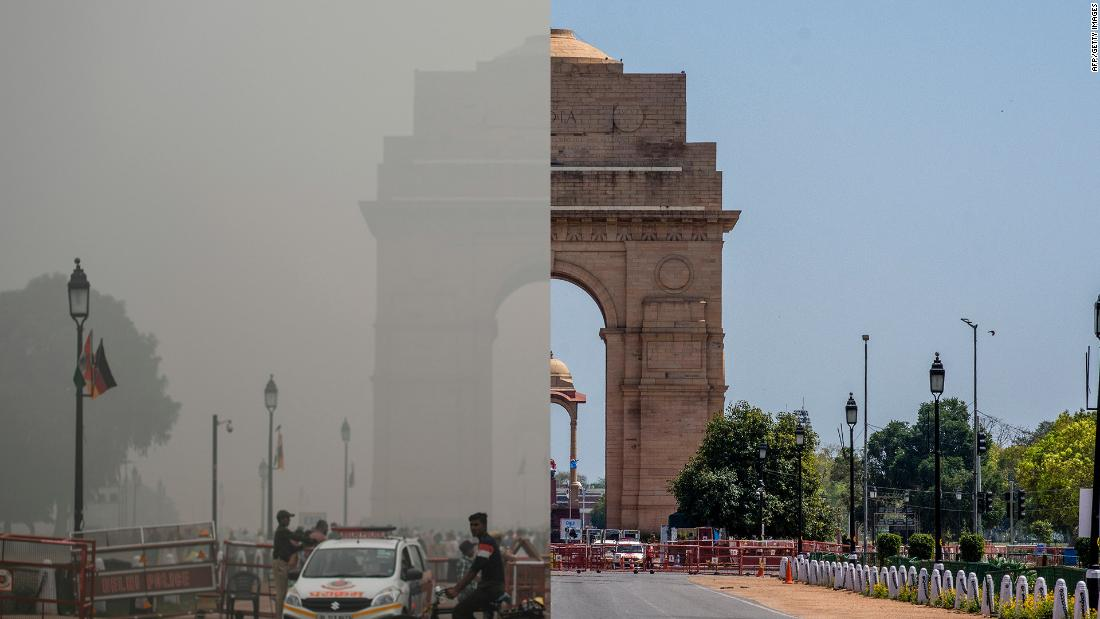

India is the seventh-largest country by area, the second-most populous country, and the most populous democracy in the world. By 2020 India had an estimated population of 1.38 billion people. No wonder it has one of the largest economies in the world, currently at seventh position based on GDP with an expected uptrend due to continuous growth. With trade agreements with over 50 countries India's impact to the world is every important both locally and globally. In this notebook I look at the data of gaseous emissions and air quality index (AQI) of India's city during this time of global economy success.

Humans need air to live, beyond that simple fact of life is the question of what is in the air we breathe. As observed in histroy, economic growth is usually accompanyed with an increase in gaseous emissions. This obivously negatively impacts the quality of air so in this notebook I will use data to find out the trends in the gaseous emissions and AQI of cities in India. The dataset I am using is sourced from India's Central Pollution Control Board through kaggle. The database contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India. In this study, I will focus on the gaseous emission like ammonia (NH3), nitrogenous oxides (NOx), ozone (O3), sulphur dioxide (SO2), nitrogen dioxide (NO2), Nitrogen monoxide (NO), Carbon monoxide (CO), Air Quality Index (AQI) and Air Quality Index Bucket (AQI_Bucket)

What is Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn, Geopandas etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

Here's the outline of the steps to follow:

* Downloading a dataset from an online source
* Data preparation and cleaning with Pandas
* Open-ended exploratory analysis and visualization
* Asking and answering interesting questions
* Summarizing inferences and drawing conclusions

By the end of the project we'll have gained high level insights on the trends on gaseous emissions and the AQI of cities across India.

# How to run the code
The easiest way to start executing the code is to click the Run button at the top of this page and select Run on Colab as long as you have gmail account. You can also select "Run on Binder" or "Run on Kaggle", but you'll need to create an account on Kaggle to use that platform. You can make changes and save your own version of the notebook to Jovian by executing the following cells.

Since the selected dataset contains 5+ million rows of data, I have selected "Gogle Colab" to execute the code for faster response.

When you are commiting the notebook to Jovian for the first time in "Colab" it will ask for API key which will be found in your Jovian account getstarted section. After which pressing "Ctrl + S" on windows or "Cmd + S" on mac will save changes on your jovian notebook.

## Installing the required packages
In this project, we'll use data analysis tools like Numpy, Pandas and visulization tools like matplotlib, seaborn, plotly and folium. Before that we need packages like jovian, opendatasets, geopandas inorder to have access to the necessary libraries.
let's install the required libraries and import them.

In [ ]:
# installing the required packages
!pip install jovian opendatasets geopandas --upgrade --quiet
import jovian

     |████████████████████████████████| 68 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 18.1 MB/s 
     |████████████████████████████████| 7.8 MB 58.0 MB/s 
     |████████████████████████████████| 16.6 MB 57.9 MB/s 


In [ ]:
# Import the required libraries
##Python library for downloading datasets from kaggle
import opendatasets as od
#Python library for data analysis
import pandas as pd
#Python library for numerical computing library
import numpy as np
#Python library for creating static visualizations
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm, colors
#Python library that enables high-level interface for drawing informative statistical graphics.
import seaborn as sns
#Python library for creating interactive visualizations
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#Python library for data analysis with geospatial data
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString
#Python library for plotting intereactive maps using geospatial data
import folium
#Python library for creating wordcloud in python
import wordcloud

Let's set the chart style, font size, figure size and figure facecolour using matplotlib. These are reflected only to matplot and seaborn charts.

In [ ]:
# defining the size and theme of the plot box of this notebook
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [12, 8]
# it turns on “inline plotting”, where plot graphics will appear in your IPython shell that is currently running and not in a separate output window.

# Dataset from Kaggle. 
In this notebook, I have selected Air Quality Data in India (2015 - 2020) from Kaggle datasets. This dataset contains 5 csv files from India's Central Pollution Control Board. For this project I used data from the city_day csv file from which I looked at ammonia, nitrogenous oxides, ozone, sulphur dioxide, nitrogen dioxide, Nitrogen monoxide and Carbon monoxide emissions plus Air Quality Index and Air Quality Index Bucket data. The data is collected from 1st January 2015 to 1st July 2020 and 26 cities across India. You can find the dataset here https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

The opendatasets library will be used to download the dataset from Kaggle datasets. We have already installed and imported opendatasets library as od in the above section of installing required libraries.

In [ ]:
# assign dataset url to a variable
dataset_url = 'https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india'
# download the dataset using opendatasets from Kaggle
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: najo1on1
Your Kaggle Key: ··········


100%|██████████| 72.9M/72.9M [00:01<00:00, 40.9MB/s]


In [ ]:
# load csv file path in a variable
city_day_data = '/content/air-quality-data-in-india/city_day.csv'
# load the dataset and display the dataframe
city_day_raw_df = pd.read_csv(city_day_data)
city_day_raw_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


The dataframe contains over 29531 rows and 16 columns. The data is from Jan 2015 to Jul 2020. The information is collected per day from 26 across Indian city.

NB: Remember to save changes to your notebook.

## Data preparation and cleaning
The insights and trends deduced from data are only helpful if data of high quality is used. Therefore examining the quality of data in the dataframe is a crucial intial step in Data Analysis and Visualization.During data cleaning the data is examined so as to fix or remove incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. Since the intial summary about the dataframe by Kaggle shows there missing values in our target columns.

NB: Before starting any analysis of a Kaggle dataset, look at the summary and visualization on the kaggle dataset page.

Let's view some basic information about the data.

In [ ]:
city_day_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Of the 16 columns we only need City, Date, AQI, AQI_Bucket, NOx, O3, SO2, NO2, NO NH3, CO. So in the interest of preserving the original dataframe, we will create a new dataframe city_day_df.

In [ ]:
# selected_columns
selected_columns = ['City', 'Date', 'NOx', 'O3', 'SO2', 'NO2', 'NO', 'NH3', 'CO',  'AQI', 'AQI_Bucket']
# creating city_day_df
city_day_df = city_day_raw_df[selected_columns]
# viewing city_day_df columns
city_day_df.columns

Index(['City', 'Date', 'NOx', 'O3', 'SO2', 'NO2', 'NO', 'NH3', 'CO', 'AQI',
       'AQI_Bucket'],
      dtype='object')

Let's view some basic information about the data about city_day_df

In [ ]:
#viewing the basic statistical summary of the dataframe
city_day_df.describe()

,NOx,O3,SO2,NO2,NO,NH3,CO,AQI
count,25346.000000,25509.000000,25677.000000,25946.000000,25949.000000,19203.000000,27472.000000,24850.000000
mean,32.309123,34.491430,14.531977,28.560659,17.574730,23.483476,2.248598,166.463581
std,31.646011,21.694928,18.133775,24.474746,22.785846,25.684275,6.962884,140.696585
min,0.000000,0.010000,0.010000,0.010000,0.020000,0.010000,0.000000,13.000000
25%,12.820000,18.860000,5.670000,11.750000,5.630000,8.580000,0.510000,81.000000
50%,23.520000,30.840000,9.160000,21.690000,9.890000,15.850000,0.890000,118.000000
75%,40.127500,45.570000,15.220000,37.620000,19.950000,30.020000,1.450000,208.000000
max,467.630000,257.730000,193.860000,362.210000,390.680000,352.890000,175.810000,2049.000000


From the above summary we can get an idea of the data, for this project we will take note of the mean, percentiles, min and max. Since they give us an idea of the range of our data. 

Inorder to be able to do more with the data in Date column we need to change its dtype from object to datetime.

In [ ]:
# converting the date column type from object into datetime
city_day_df['Date'] = city_day_df['Date'].astype('datetime64[ns]')

<ipython-input-9-6fabe77956c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_day_df['Date'] = city_day_df['Date'].astype('datetime64[ns]')


Now with our Date column as a datetime type, we can perform more data manipulation and formating than before like in this notebook we will extract the year and name of the month into there respectively named columns.

In [ ]:
# extracting the name of the month from the corresponding date row
city_day_df['month'] = city_day_df['Date'].dt.strftime('%B')
# extracting the year from the corresponding row
city_day_df['year'] = (city_day_df['Date'].dt.year)

<ipython-input-10-13a82ff81b6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_day_df['month'] = city_day_df['Date'].dt.strftime('%B')
<ipython-input-10-13a82ff81b6d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_day_df['year'] = (city_day_df['Date'].dt.year)


In [ ]:
# viewing an update on the basic summary of the dataframe
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   NOx         25346 non-null  float64       
 3   O3          25509 non-null  float64       
 4   SO2         25677 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NO          25949 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   AQI         24850 non-null  float64       
 10  AQI_Bucket  24850 non-null  object        
 11  month       29531 non-null  object        
 12  year        29531 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 2.9+ MB


Now the dataframe contains 8 floats, 1 ints, 1 datetime and 3 object type columns.

# Open-ended exploratory analysis and visualization
Now with the basic information about the dataframe, we will now perform more specfic data analysis to helps us to understand the situation deeply, by digging into the data, so that we can find the "gold" in the data "mine" so as to find the hidden insights.
> We will start by looking at the columns with observable variables individually.   

## City
This column gives the City name from which the data wass collected.Let's look at the number of City present in the dataset.

In [ ]:
# finding out the unique entries in the City column
city_day_df.City.nunique()

26

Lets identify the cities and their corresponding number of recorded data using the value_counts method.

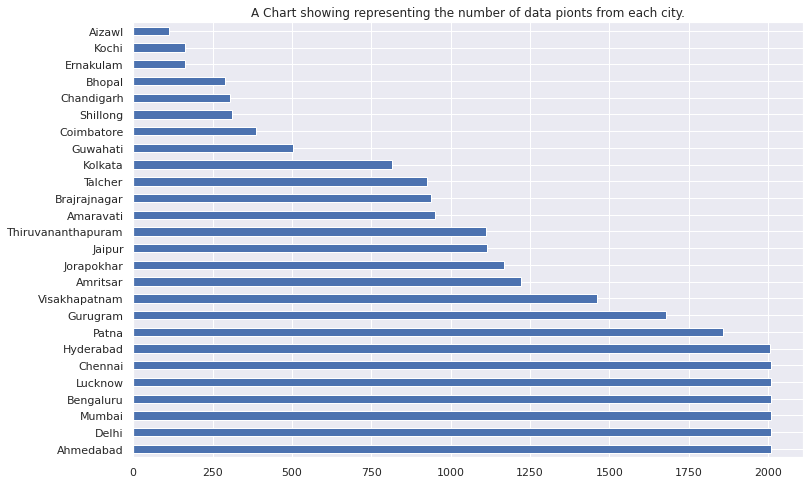

In [ ]:
# Using value_counts to count the number of times a unique entry appears in the City column
city_values= city_day_df.City.value_counts()
# Using .plot to represent the results in a bar chart 
city_values.plot(kind='barh').set(title="A Chart showing representing the number of data pionts from each city.");

Since the columns 'NOx', 'O3', 'SO2', 'NO2', 'NO', 'NH3', 'CO', 'AQI' and 'AQI_Bucket' have the same kind of data we will use the same kind of plot to display the data. 

## Nitrogen Oxides (NOx)
Next, we'll analyze 'NOx' column whose primary emission sources are: transportation sources (e.g. on-road and off-road motor vehicles and engines, rail) fossil-fuelled electric power plants. upstream oil and gas industry (e.g. natural gas plants, oil sands). Using pandas function we will look at the max and min values per City then max and min values per City per year and max and min values per City per month. 

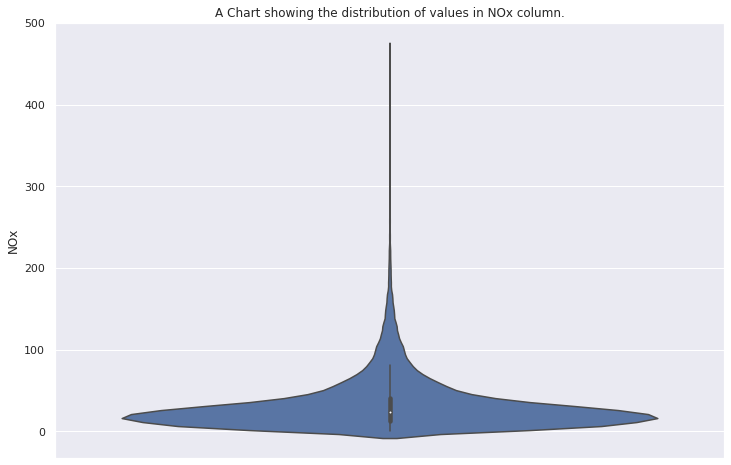

In [ ]:
# Using seaborn to plot a violin plot of the NOx column
sns.violinplot(y=city_day_df.NOx).set(title="A Chart showing the distribution of values in NOx column.");

The chart above shows us the distribution of values recorded as data for the NOx column. From it we see the data ranges from zero to around 468 with a median of 20.76. I used a violin plot in order to visualize the count of each value in the column. We can see that the bulk of the values are from below 50 with significant count of values up to 200 which explains the low median despite the wide range of values. 

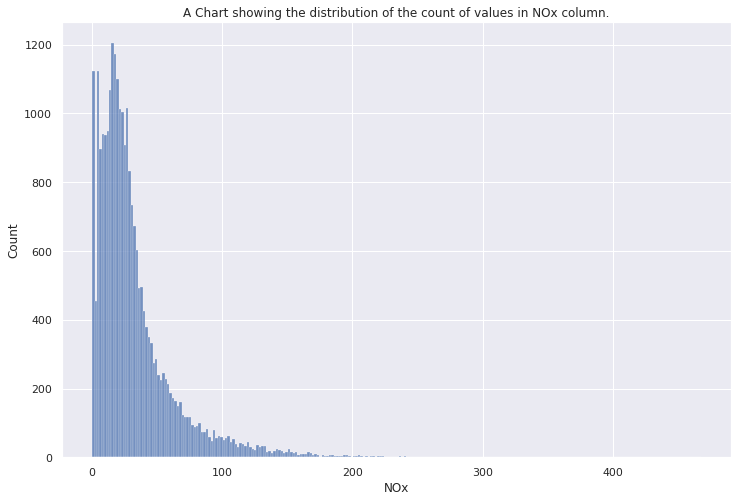

In [ ]:
# Using seaborn to visualise the distribution of the count of pionts in NOx column
sns.histplot(city_day_df.NOx).set(title="A Chart showing the distribution of the count of values in NOx column.");

The histogram above shows a more detailed picture of the distribution of the count of values in the NOx column. We can see that;
> The median bin has a count of around 1200.

> Zeros have a count of above 1000

> Seven bins including the median have counts above 1000




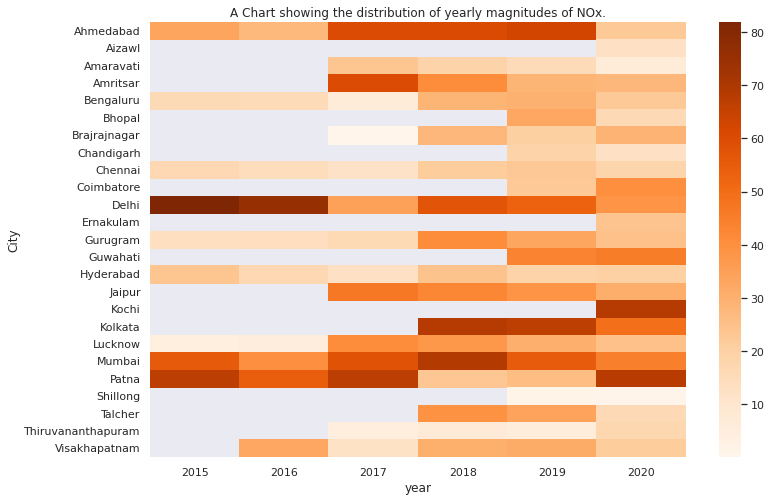

In [ ]:
# Using .pivot_table to create a pivot table of magnitude of pionts of each City per year
pivot_NOx_year = city_day_df.pivot_table(index='City', columns='year', values='NOx')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(pivot_NOx_year, cmap='Oranges').set(title="A Chart showing the distribution of yearly magnitudes of NOx.");

From the above heatmap we see the distribution of values between the maximum and minimum of NOx values between 2015 and 2020. Its noted that;
> Delhi in 2015 had the highest ever recorded values in a year 

> In 2020 Kochi and Patna recorded the highest values 

> In 2019 and 2020 Shillong recorded the lowest values in a year ever recorded 

## Ozone (O3)
Next, we'll analyze O3 column whose primary emission sources are: from cars, power plants, industrial boilers, refineries, and chemical plants. Using pandas function we will look at the max and min values per City then max and min values per City per year and max and min values per City per month.

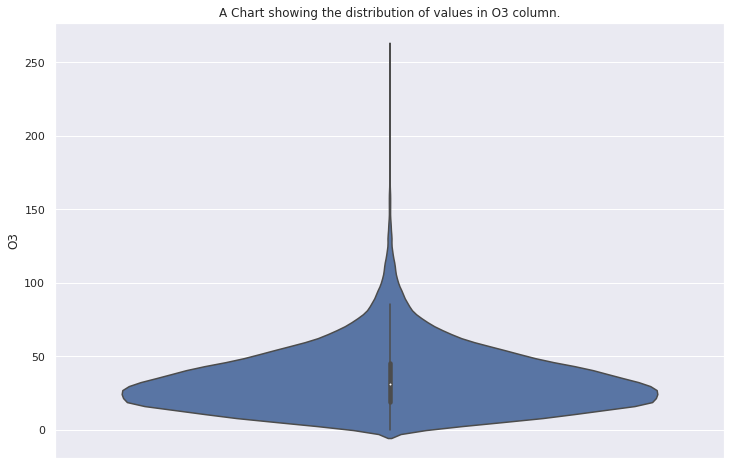

In [ ]:
# Using seaborn to plot a violin plot of the O3 column
sns.violinplot(y=city_day_df.O3).set(title="A Chart showing the distribution of values in O3 column.");

The chart above shows us the distribution of values recorded as data for the O3 column. From it we see the data ranges from zero to around 258 with a median of 28.61. I used a violin plot in order to visualize the count of each value in the column. We can see that the bulk of the values are below 50 with significant count of values up to 150 which explains the low median despict the wide range of values. 

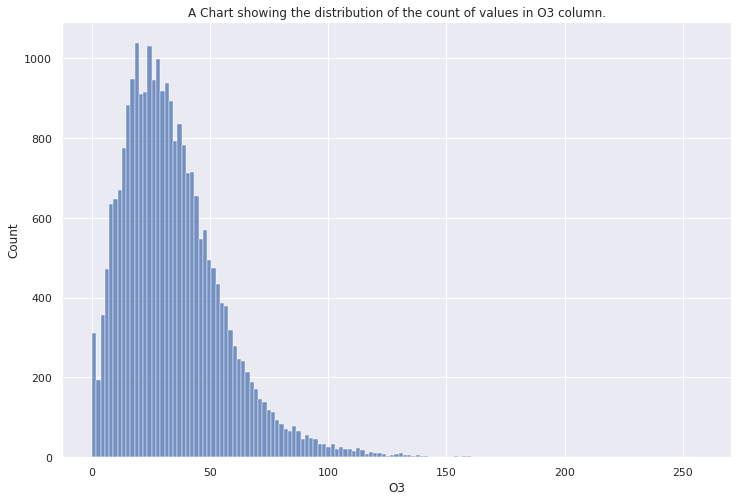

In [ ]:
# Using seaborn to visualise the distribution of the count of pionts in O3 column
sns.histplot(city_day_df.O3).set(title="A Chart showing the distribution of the count of values in O3 column.");

The histogram above shows a more detailed picture of the distribution of the count of values in the O3 column. We can see that;
> The median bin has a count of around 1100 and only two values have a count above 1000

> Over 12 bins have a count above 800 

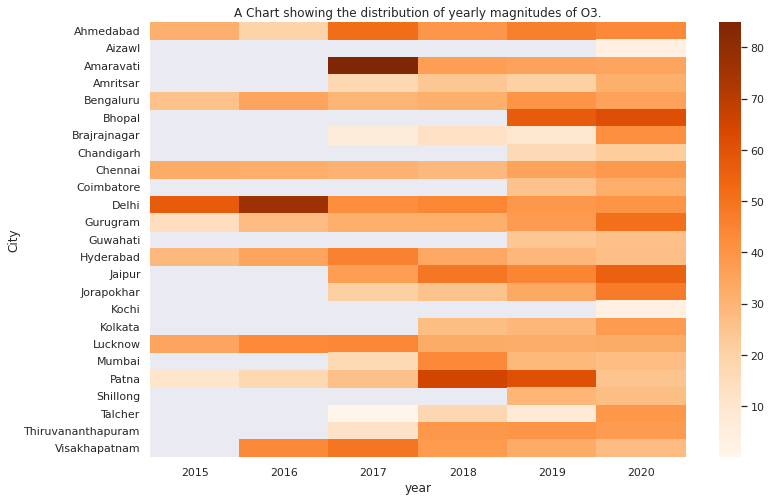

In [ ]:
# Using .pivot_table to create a pivot table of magnitude of pionts of each City per year
pivot_O3_year = city_day_df.pivot_table(index='City', columns='year', values='O3')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(pivot_O3_year, cmap='Oranges').set(title="A Chart showing the distribution of yearly magnitudes of O3."); 

From the above heatmap we see the distribution of values between the maximum and minimum of O3 values between 2015 and 2020.
> Amaravati in 2017 had the highest ever recordered values in a year

> In 2020, Bhopal has the highest recorded values

> Ernakulam and Kochi have the lowest recorded values in a year ever recorded

## Sulphur Dioxide (SO2)
Next, we'll analyze SO2 column whose primary emission sources are: electricity utilities especially coal-based thermal power plants. Using pandas function we will look at the max and min values per City then max and min values per City per year and max and min values per City per month.

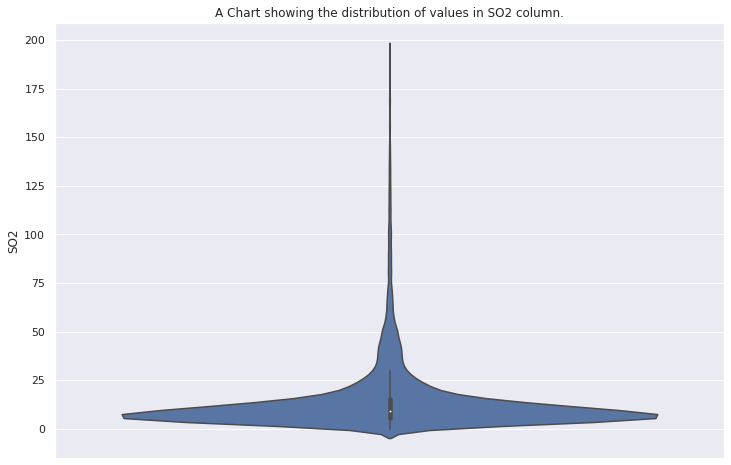

In [ ]:
# Using seaborn to plot a violin plot of the SO2 column
sns.violinplot(y=city_day_df.SO2).set(title="A Chart showing the distribution of values in SO2 column.");

The chart above shows us the distribution of values recorded as data for the SO2 column. From it we see the data ranges from zero to around 194 with a median of 8.6. I used a violin plot in order to visualize the count of each value in the column which explains the very low median despite the wide range of values. We can see that the bulk of the values are below 25 with significant count of values up to 75 which explains the low median despict the wide range of values.

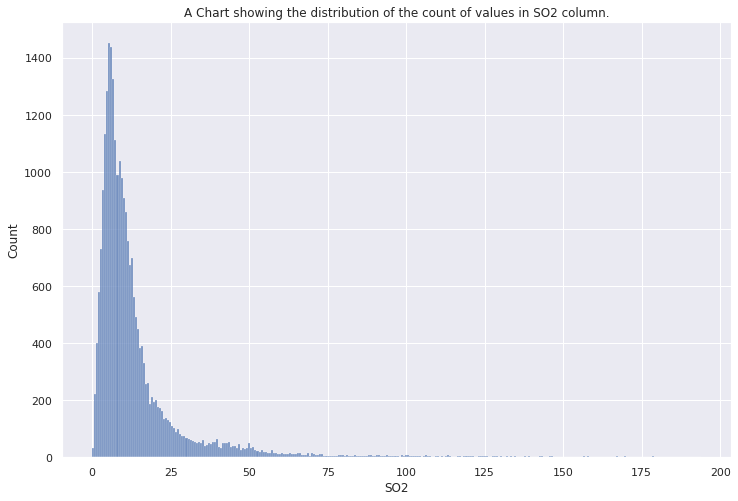

In [ ]:
# Using seaborn to visualise the distribution of the count of pionts in SO2 column
sns.histplot(city_day_df.SO2).set(title="A Chart showing the distribution of the count of values in SO2 column.");

The histogram above shows a more detailed picture of the distribution of the count of values in the SO2 column. We can see that;
> The median bin has acount of 1400 and only two values have a count above 1400 

> Only 3 bins have values above 1200 and six values have a count above 1000

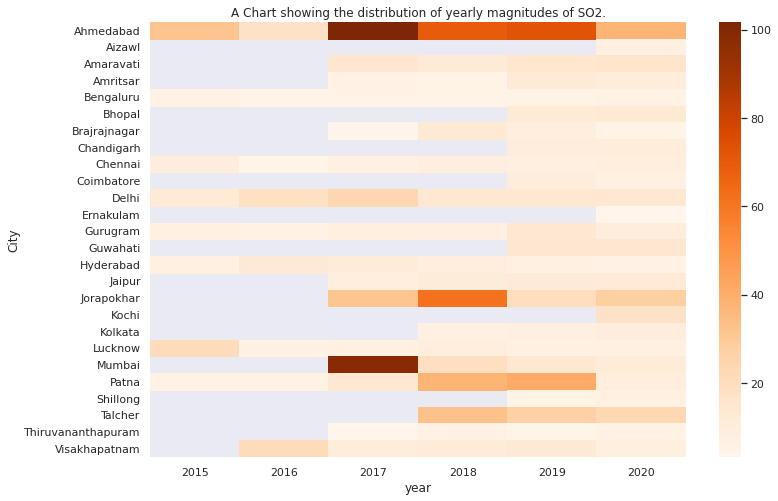

In [ ]:
# Using .pivot_table to create a pivot table of magnitude of pionts of each City per year
pivot_SO2_year = city_day_df.pivot_table(index='City', columns='year', values='SO2')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(pivot_SO2_year, cmap='Oranges').set(title="A Chart showing the distribution of yearly magnitudes of SO2."); 

From the above heatmap we see the distribution of values between the maximum and minimum of SO2 values between 2015 and 2020.
> Ahmedabad in 2019 and 2018 respectively had the highest and 2nd highest values ever recorded.

> In 2020, Ahmedabad had the highest values recorded.


## Nitrogen Dioxide (NO2)
Next, we'll analyze NO2 column whose primary emission sources are: transportation sources especially combustion of fossil fuels (coal, gas and oil) especially fuel used in cars. Using pandas function we will look at the max and min values per City then max and min values per City per year and max and min values per City per month.

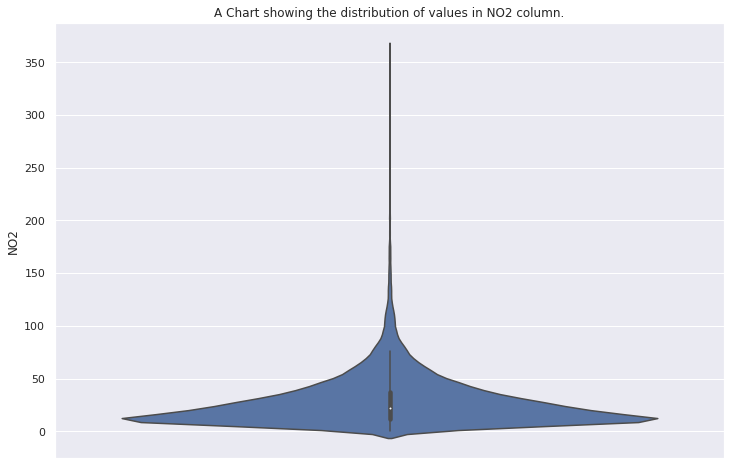

In [ ]:
# Using seaborn to plot a violin plot of the NO2 column
sns.violinplot(y=city_day_df.NO2).set(title="A Chart showing the distribution of values in NO2 column.");

The chart above shows us the distribution of values recorded as data for the NO2 column. From it we see the data ranges from zero to around 363 with a median of 19.5. I used a violin plot in order to visualize the count of each value in the column. We can see that the bulk of the values are below 50 with significant count of values up to 100 which explains the low median despite the wide range of values. 

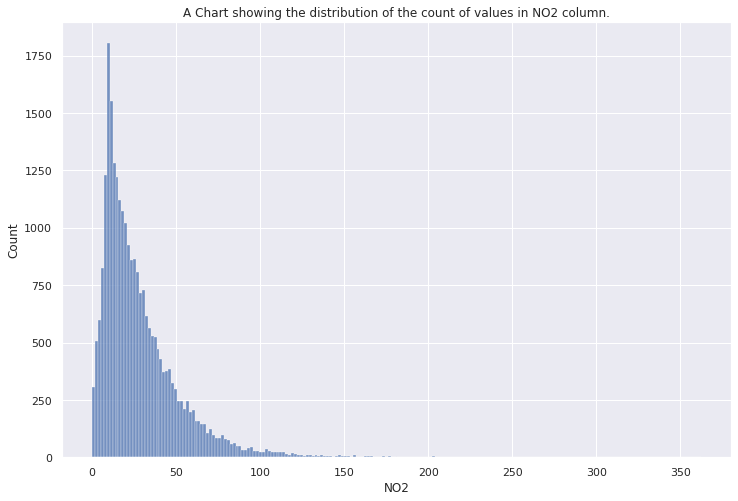

In [ ]:
# Using seaborn to visualise the distribution of the count of pionts in NO2 column
sns.histplot(city_day_df.NO2).set(title="A Chart showing the distribution of the count of values in NO2 column.");

The histogram above shows a more detailed picture of the distribution of the count of values in the NO2 column. We can see that;
> The median bin has a count of around 1800

> The bin with the 2nd highest count has a value of around 1600

> Only nine bin have a count above 1000

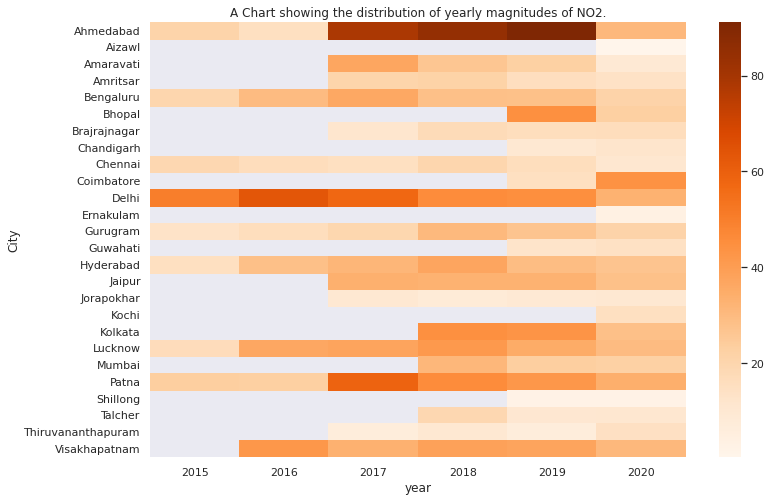

In [ ]:
# Using .pivot_table to create a pivot table of magnitude of pionts of each City per year
pivot_NO2_year = city_day_df.pivot_table(index='City', columns='year', values='NO2')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(pivot_NO2_year, cmap='Oranges').set(title="A Chart showing the distribution of yearly magnitudes of NO2."); 

From the above heatmap we see the distribution of values between the maximum and minimum of NO2 values between 2015 and 2020.
> Ahmedabad in 2019 and 2018 respectively had the highest and 2nd highest values ever recorded.

> In 2020, Coimbatore had the highest values recorded.

> Shillong in 2019 and 2020 and Ernakulam in 2020 had the lowest ever recorded values in a year.

## Nitrogen monoxide (NO)
Next, we'll analyze NO column whose primary emission sources are: main sources of NO are combustion processes, partially from nitrogen compounds in fuel and from the direct combination of atmospheric oxygen and nitrogen in flames. Using pandas function we will look at the max and min values per City then max and min values per City per year and max and min values per City per month.

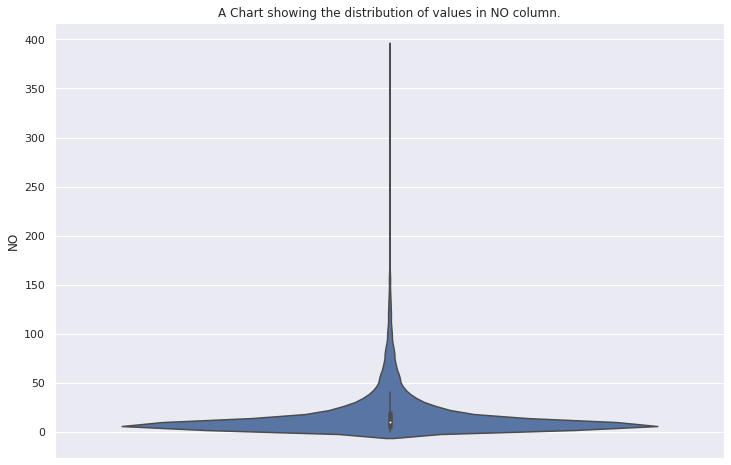

In [ ]:
# Using seaborn to plot a violin plot of the NO column
sns.violinplot(y=city_day_df.NO).set(title="A Chart showing the distribution of values in NO column.");

The chart above shows us the distribution of values recorded as data for the NO column. From it we see the data ranges from zero to around 391 with a median of 9.26. I used a violin plot in order to visualize the count of each value in the column. We can see that the bulk of the values are below 50 with significant count of values up to 100 which explains the low median despite the wide range of values. 

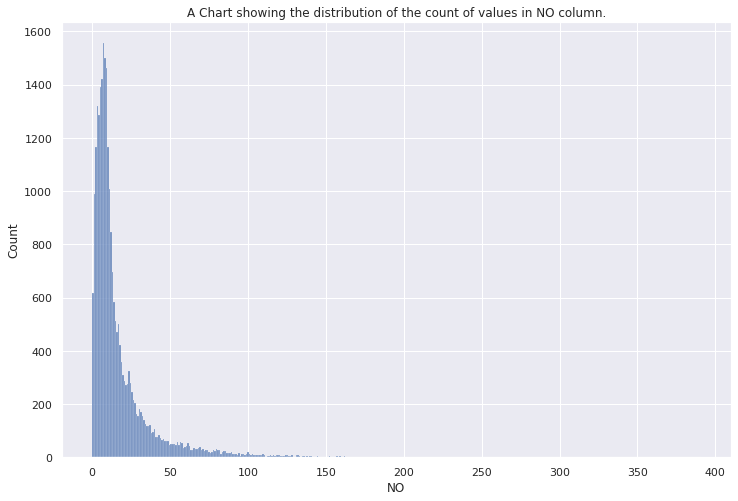

In [ ]:
# Using seaborn to visualise the distribution of the count of pionts in NO column
sns.histplot(city_day_df.NO).set(title="A Chart showing the distribution of the count of values in NO column.");

The histogram above shows a more detailed picture of the distribution of the count of values in the NO column. We can see that;
> The median bin has a value count of around 1550

> Only 7 bins have a count above 1000

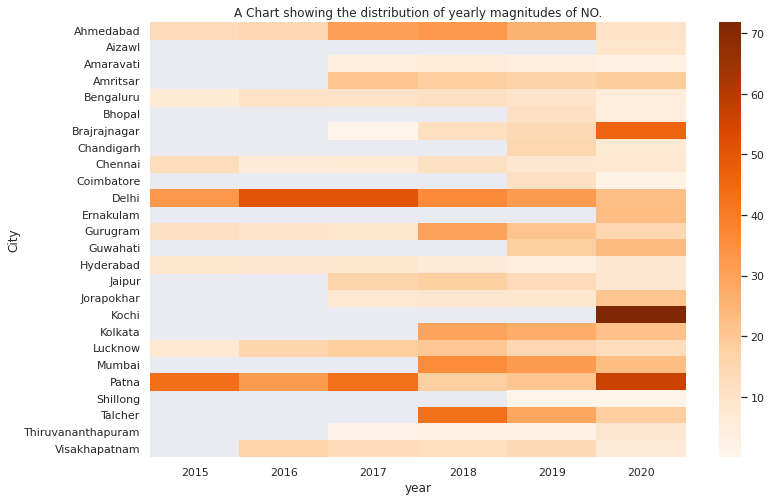

In [ ]:
# Using .pivot_table to create a pivot table of magnitude of pionts of each City per year
pivot_NO_year = city_day_df.pivot_table(index='City', columns='year', values='NO')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(pivot_NO_year, cmap='Oranges').set(title="A Chart showing the distribution of yearly magnitudes of NO.");

From the above heatmap we see the distribution of values between the maximum and minimum of NO values between 2015 and 2020.
> Kochi in 2020 had the highest value ever recorded in year.

> Shillong in 2019 and 2020 and Coimbatore in 2020 had the lowest ever recorded values in a year.

## Ammonia (NH3)
Next, we'll analyze NH3 column whose primary emission sources are: Human waste, wild animal waste, and decomposition  especially in agriculture, including animal husbandry and NH3-based fertilizer applications. Using pandas function we will look at the max and min values per City then max and min values per City per year and max and min values per City per month.

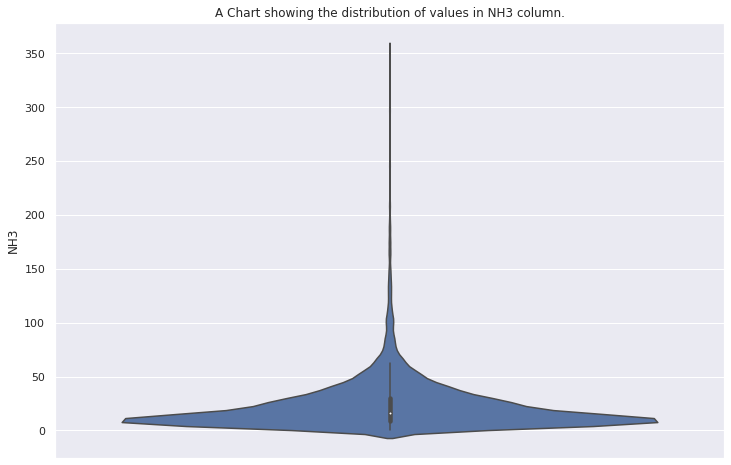

In [ ]:
# Using seaborn to plot a violin plot of the NH3 column
sns.violinplot(y=city_day_df.NH3).set(title="A Chart showing the distribution of values in NH3 column.");

The chart above shows us the distribution of values recorded as data for the NH3 column. From it we see the data ranges from zero to around 353 with a median of 9.12. I used a violin plot in order to visualize the count of each value in the column. We can see that the bulk of the values are below 50 with significant count of values up to 100 which explains the low median despite the wide range of values. 

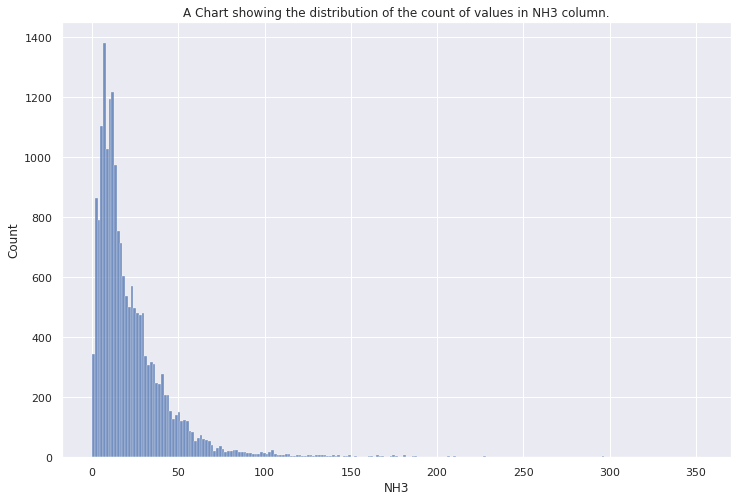

In [ ]:
# Using seaborn to visualise the distribution of the count of pionts in NH3 column
sns.histplot(city_day_df.NH3).set(title="A Chart showing the distribution of the count of values in NH3 column.");

The histogram above shows a more detailed picture of the distribution of the count of values in the NH3 column. We can see that;
> the median bin has a count of around 1350

> the bin with the 2nd highest count has a count of around 1250

> Only 7 bins have a count above 1000.

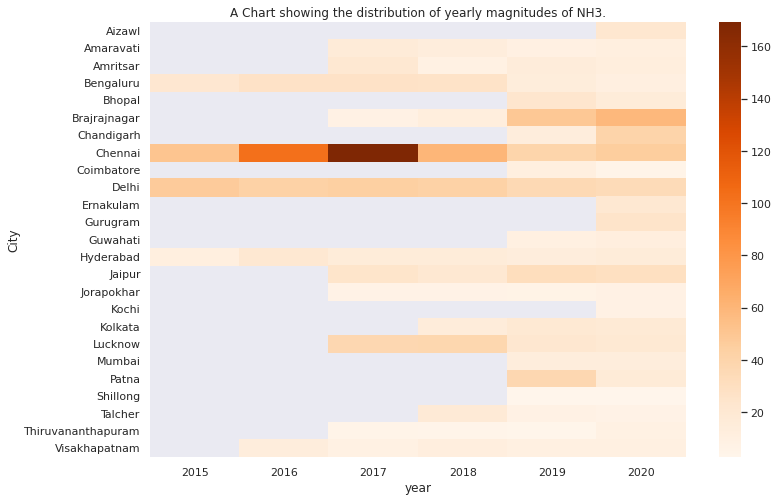

In [ ]:
# Using .pivot_table to create a pivot table of magnitude of pionts of each City per year
pivot_NH3_year = city_day_df.pivot_table(index='City', columns='year', values='NH3')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(pivot_NH3_year, cmap='Oranges').set(title="A Chart showing the distribution of yearly magnitudes of NH3.");  

From the above heatmap we see the distribution of values between the maximum and minimum of NH3 values between 2015 and 2020.
> Chennai in 2017 and 2016 respectively had the highest and second highest value ever recorded in a year

> Coimbatore in 2020 had the lowest value ever recorded in a year

## Carbon monoxide (CO)
Next, we'll analyze CO column whose emission sources are: mainly from biofuel use and then emissions produced by fossil fuel–powered engines, including motor vehicles and non-road engines and vehicles (such as construction equipment and boats). Using pandas function we will look at the max and min values per City then max and min values per City per year and max and min values per City per month.

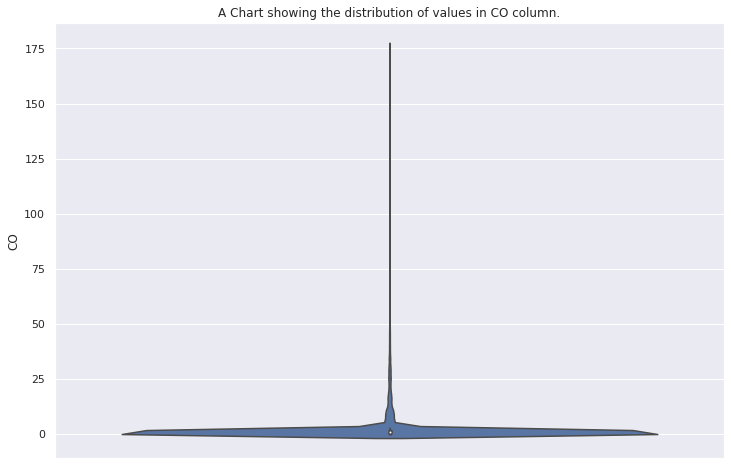

In [ ]:
# Using seaborn to plot a violin plot of the CO column
sns.violinplot(y=city_day_df.CO).set(title="A Chart showing the distribution of values in CO column.");

The chart above shows us the distribution of values recorded as data for the O3 column. From it we see the data ranges from zero to around 176 with a median of 0.87. I used a violin plot in order to visualize the count of each value in the column. We can see that the bulk of the values are below 8 with significant count of values up to 10 which explains the very low median despite the wide range of values. 

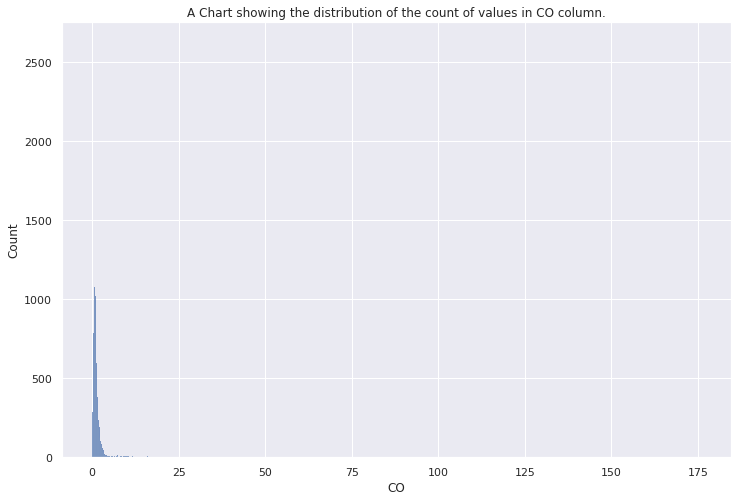

In [ ]:
# Using seaborn to visualise the distribution of the count of pionts in CO column
sns.histplot(city_day_df.CO).set(title="A Chart showing the distribution of the count of values in CO column.");

The histogram above shows a more detailed picture of the distribution of the count of values in the NOx column. We can see that; 
> The median bin has a count of around 1100

> Only two bins have a count above 1000

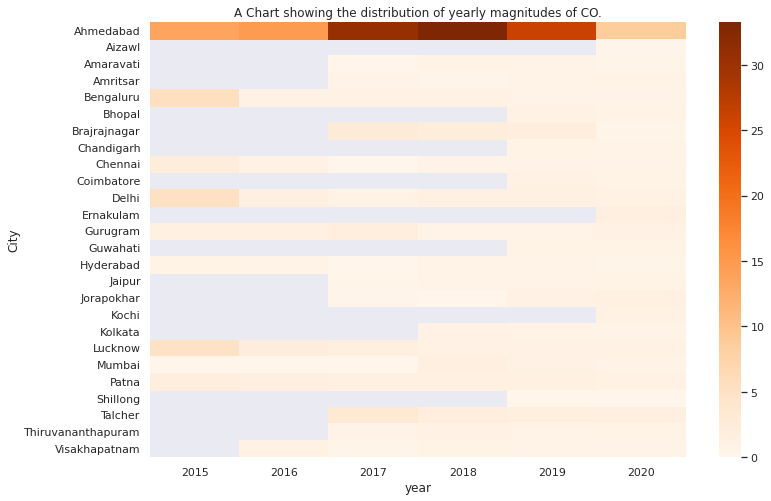

In [ ]:
# Using .pivot_table to create a pivot table of magnitude of pionts of each City per year
pivot_CO_year = city_day_df.pivot_table(index='City', columns='year', values='CO')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(pivot_CO_year, cmap='Oranges').set(title="A Chart showing the distribution of yearly magnitudes of CO."); 

From the above heatmap we see the distribution of values between the maximum and minimum of CO values between 2015 and 2020.
> Ahmedabad in 2018, 2017 and 2019 respectively had the highest, 2nd highest and 3rd highest values ever recorded in a year.

> Shillong in 2019 and 2020 had the lowest values ever recorded in a year.

## Air Quality Index (AQI)
Next, we'll analyze AQI column which is an internationally recognised means used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become.
 Using pandas function we will look at the max and min values per City then max and min values per City per year and max and min values per City per month.

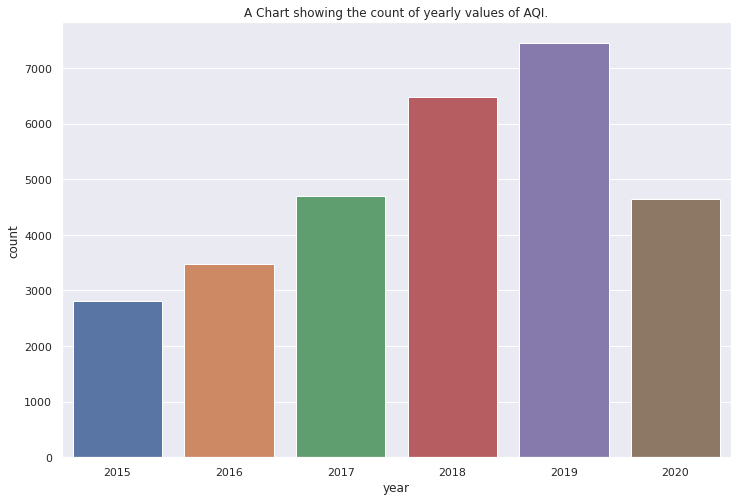

In [ ]:
# Using seaborn to visualise the count of AQI variables per year
sns.countplot(data=city_day_df[['year','AQI']], x='year').set(title="A Chart showing the count of yearly values of AQI.");

From the above graph its observed that the magnitude of AQI generally increases from 2015 to 2020 a normal (Gaussian) distribution.
> With the;

>* the highest total count during 2019
>* the lowest total count  during 2015



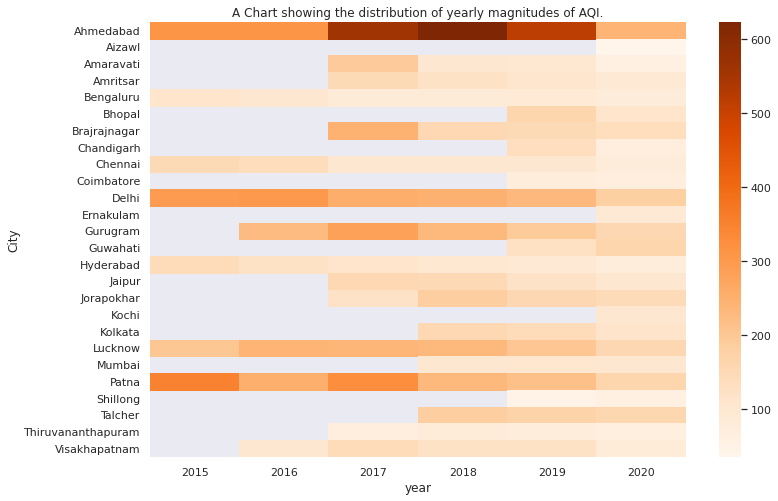

In [ ]:
# Using .pivot_table to create a pivot table of magnitude of pionts of each City per year
pivot_AQI_year = city_day_df.pivot_table(index='City', columns='year', values='AQI')
# Using seaborn to visualise the pivot table as a heatmap
sns.heatmap(pivot_AQI_year, cmap='Oranges').set(title="A Chart showing the distribution of yearly magnitudes of AQI."); 

From the above heatmap we see the distribution of values between the maximum and minimum of AQI values between 2015 and 2020.
> Ahmedabad in 2018, 2017 and 2019 had the highest ever recorded values in a year.

> In 2020, Ahmedabad had the highest recorded values.

> Shillong in 2019 and 2020 had the lowest ever recorded values in a year

## AQI_Bucket 
Description of AQI ranges used by India government

The pre-defined buckets of AQI are as follows:
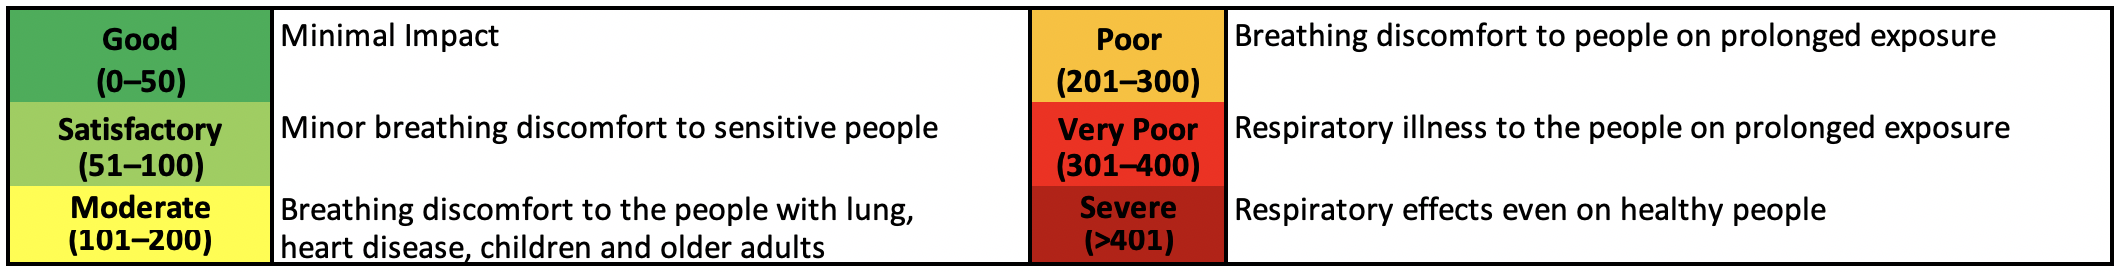

In [ ]:
city_day_df.AQI_Bucket.value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [ ]:
# Using plotly to display the counts of each AQI_Bucket as a percentage 
fig_AQI_pie = px.pie(city_day_df, values=city_day_df.AQI_Bucket.value_counts(), names=city_day_df.AQI_Bucket.value_counts().index,
                     title = 'Percentage distribution of the total number of pionts of each categorisation of Air Quality'
                     )

fig_AQI_pie.update_layout(autosize=False,
                          width=1000,
                          height=500,
                          legend_title = 'AQI_Bucket',
                          title_x=0.5
                          )

fig_AQI_pie

The pie-chart shows us that 
* The most of India's AQI is described as Moderate
* Very little of India's AQI is considered Good
* The description of satisfactory is the second most popular after Moderate
* 15.9% of AQI in the dataframe has no description.


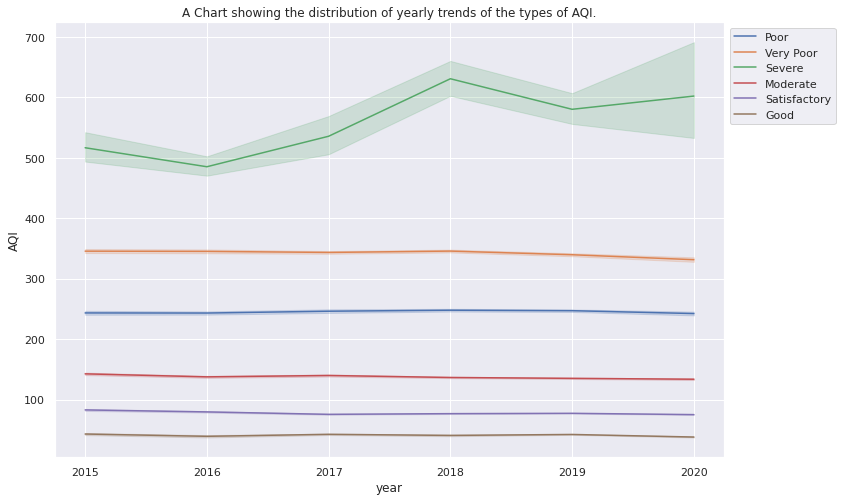

In [ ]:
# Using seaborn to show the trend of AQI_Bucket between 2015 to 2020
sns.lineplot(data= city_day_df, 
             x='year', y='AQI', 
             hue='AQI_Bucket'
             ).set(title="A Chart showing the distribution of yearly trends of the types of AQI.")

#place legend outside top right corner of plot             
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

From the line plot its noted that;
* 2018 had the highest number of AQI being called serve which was followed by a decrease in 2019 then an increase in 2020 beyond the peak of 2018.
* The number of AQI being called very poor, poor, satisfactory, Good and moderate have been constant over the years.
* Since the decrease in 2017 the number of No Record data pionts in AQI has been increasing 

## NAN
Before we start the next part of our exploring the data, we need to check for NAN values and see how it affects our data's quality. Also, handling the NAN will increase the number of plotly graphs that we can use for our visualisation

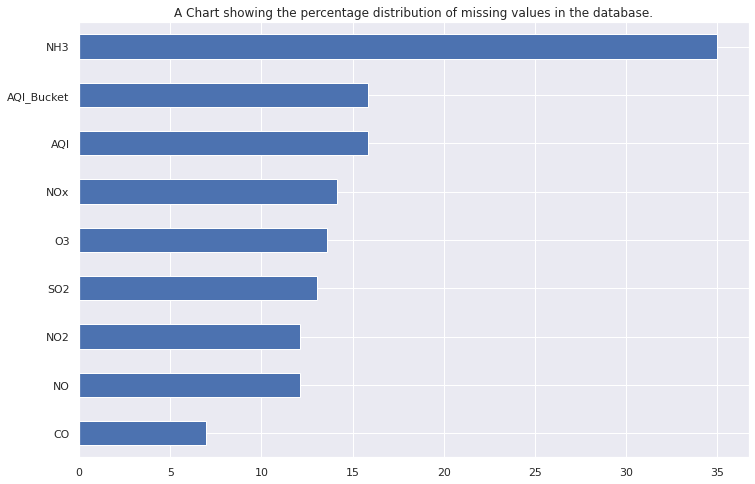

In [ ]:
# Using the original dataframe inorder to get data that isnt affected by the previous data manipulations 
missing_values = city_day_raw_df[['City', 'Date','NOx', 'O3', 'SO2', 'NO2', 'NO', 'NH3', 'CO', 'AQI', 'AQI_Bucket']]
# Extracting the number of missing values per selected column
nan_values = missing_values.isna().sum().sort_values(ascending=True)*100/len(missing_values)
# Using plot to visualise the results
nan_values[nan_values != 0].plot(kind='barh').set(title="A Chart showing the percentage distribution of missing values in the database.");

From the chart above we can see that almost 35% of 'NH3' data is NAN so we cant drop the rows with NAN no replace it with zeros because emissions are emitted daily. So, we will fill the NAN with mean but the mean per city and date is different. Thus for best filler we will replace NAN with mean based on group by City and month plus year.


<ipython-input-41-7f087bb9cdc1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



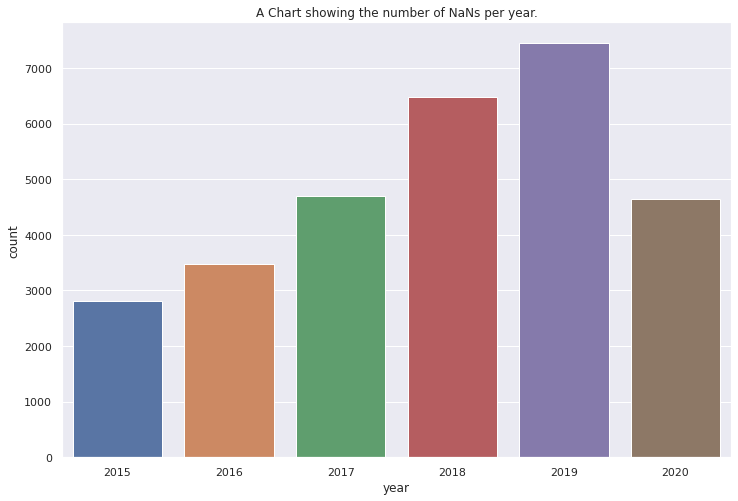

In [ ]:
# Adding year column to the missing_values dataframe
missing_values['year'] = (city_day_df['Date'].dt.year)
# Using seaborn to visualise the count of missing values in the AQI column per year 
sns.countplot(data=missing_values[['year','AQI']], x='year').set(title="A Chart showing the number of NaNs per year.");


From the above graph it's noted the number of NANs are increasing from from 2015 to 2020 in bell-like curve. The decrease between 2019 and 2020 is probably due to limited operation of the stations due to the pandemic restrictions

In [ ]:
# add month and year column to our dataframe 
city_day_df['group_details'] = city_day_df['City'] + (city_day_df['year'].astype('str'));

<ipython-input-42-a9d1741d557a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Creating a for loop to fill NaNs based on City, month and year
for column in city_day_df.columns:
  # exluding columns with string variables 
  if column == 'City' or column == 'Date' or column == 'month' or column == 'group_details':
    continue
  # filling NaNs in AQI_Bucket since its the only column with NaNs and string variables
  elif column == 'AQI_Bucket':
    city_day_df[column] = city_day_df[column].fillna('No Record')
  # filling NaNs with mean based on the grouping criteria
  else:
    city_day_df[column] = city_day_df[column].fillna(city_day_df.groupby(city_day_df['group_details'])[column].transform('mean'))
    # filling the remaining NaNs with zero
    city_day_df[column] = city_day_df[column].fillna(0);

<ipython-input-43-fc9f7a5eb611>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-fc9f7a5eb611>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-fc9f7a5eb611>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Asking and Answering Questions
We've already gained several insights about the weather data by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.
1. Which cities have the worst Air Quality?
2. Which year has had the worst Air Quality on record? 
3. Which month has had the worst Air Quality?
4. Which City has the worst AQI recorded?
5. Which gaseous pollutant is most common in Air described as worst?
6. Which cities have the best Air Quality?
7. Which year has had the best Air Quality on record?
8. Which month has had the best Air Quality?
9. Which year has had the worst Air Quality on record?
10. Which City has the best Good AQI recorded?
11. Which gaseous pollutant is most common in Air described as good?












## Which cities have the worst Air Quality?
The cities with the worst Air Quality are those with the most data pionts whose AQI is described as severe.

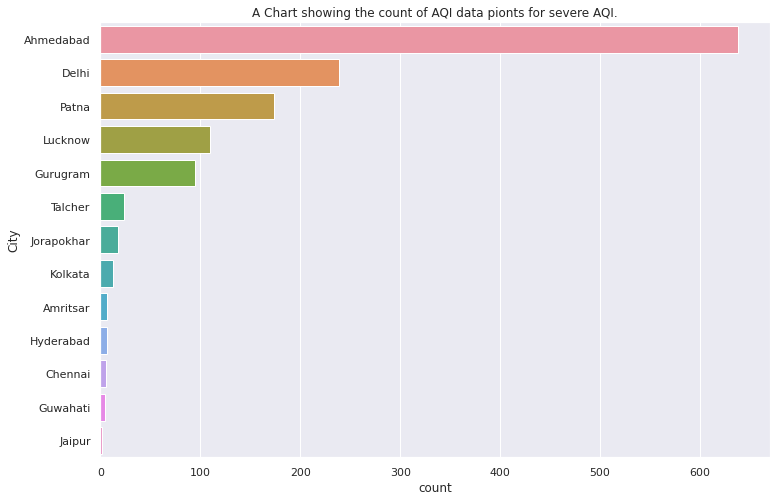

In [ ]:
# creating dataframe with only AQI_Bucket severe
AQI_severe_df =city_day_df[city_day_df['AQI_Bucket']=='Severe'] 
# displaying the count of AQI pionts per city
sns.countplot(data=AQI_severe_df, 
              y='City', 
              order = AQI_severe_df['City'].value_counts().index
              ).set(title="A Chart showing the count of AQI data pionts for severe AQI.");

From the chart its noted that the cities with the most severe AQI data pionts are Ahmedabad, Delhi, Patna, Lucknow, Gurugram, Talcher, Jorapokhar, Kolkata, Amritsar, Hyderabad, Chennai, Guwahati and Jaipur in descending order 
> Also that Ahmedabad has a huge difference between it and the 1st runner up Dehli in the number of AQI data pionts.

## Which year has had the worst Air Quality on record?


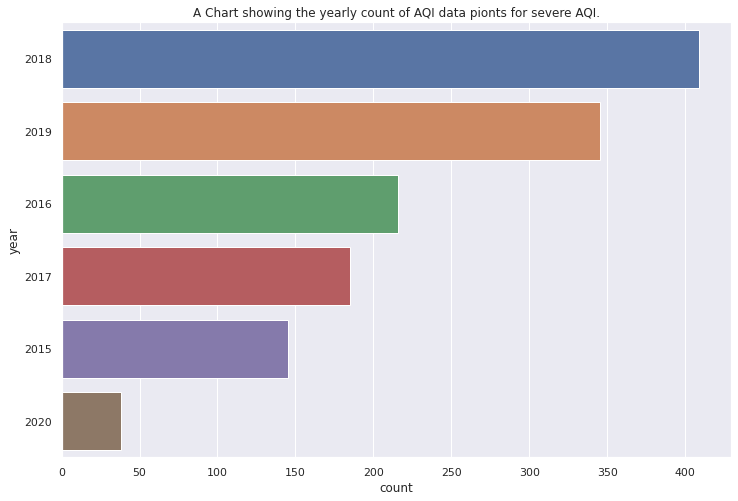

In [ ]:
# displaying the count of AQI pionts per year
sns.countplot(data=AQI_severe_df, 
              y='year', 
              order = AQI_severe_df['year'].value_counts().index).set(title="A Chart showing the yearly count of AQI data pionts for severe AQI.");

The charts shows that 2018 contributed the most data pionts to the severe AQI_Bucket in the period of 2015 to 2020. Then followed by 2019, 2016, 2017, 2015 and with 2020 contributing the least. 

## Which month has had the worst Air Quality?


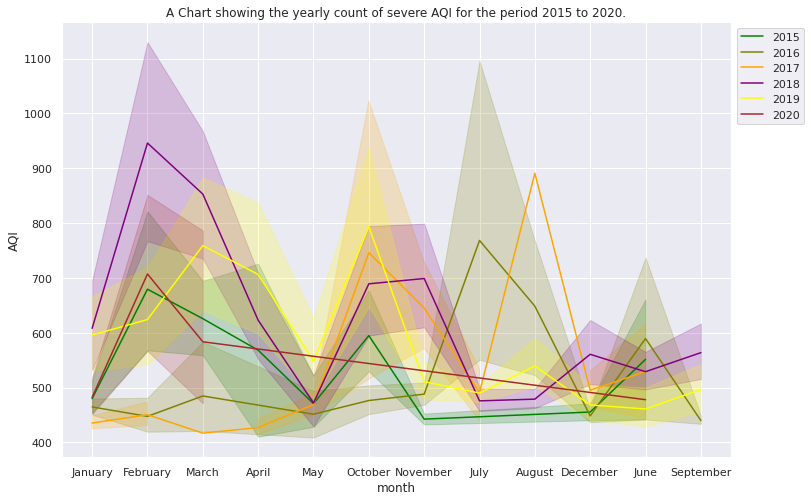

In [ ]:
# displaying the year trend of the changes in AQI magnitude per year 
sns.lineplot(data= AQI_severe_df, x='month', y='AQI', hue='year', palette={2015:'green', 
                                                                           2016:'olive', 
                                                                           2017:'orange', 
                                                                           2018:'purple', 
                                                                           2019:'yellow', 
                                                                           2020:'brown'}
             ).set(title="A Chart showing the yearly count of severe AQI for the period 2015 to 2020.")
             
#place legend outside top right corner of plot             
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

From the chart we see that February, 2018 had the highest piont of AQI with the second highest coming from July, 2016

## Which City has the worst AQI recorded?


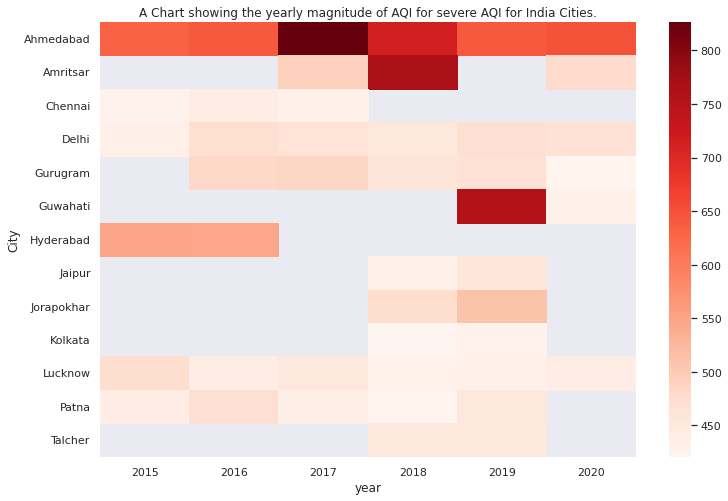

In [ ]:
# creating a dataframe with only data with AQI_BUcket severe
severe_bucket_df = city_day_df[city_day_df['AQI_Bucket'] == 'Severe']
# creating a pivot table of the magnitude of AQI values of cities per year
pivot_severe_bucket = severe_bucket_df.pivot_table(index='City', columns='year', values='AQI')
# displaying the results in a heatmap
sns.heatmap(pivot_severe_bucket, cmap='Reds').set(title="A Chart showing the yearly magnitude of AQI for severe AQI for India Cities.");

> Ahmedabad in 2017 has the highest ever recorded values of severe AQI in a year.

> In 2020, Ahmedabad had the highest values of severe AQI values. 

## Which gaseous pollutant is most common in Air described as worst?

In [ ]:
# getting the sums of the different columns of the pollutants
AQI_worst_sum = AQI_severe_df[['NOx', 'O3', 'SO2', 'NO2', 'NO', 'NH3', 'CO']].sum()
# creating a dataframe of the sums
AQI_worst_sum_df = pd.DataFrame(data=AQI_worst_sum, columns=['sum'])
# using plotly to display percedntage distribution of the sums
fig_AQI_worst_pie = px.pie(AQI_worst_sum_df, values='sum', names= AQI_worst_sum_df.index,
                           title = 'Percentage distribution of the sums of Pollutants in worst quality Air'
                           )

fig_AQI_worst_pie.update_layout(autosize=False,
                               width=1000,
                               height=500,
                               legend_title = 'Pollutants',
                               title_x=0.5
                               )

fig_AQI_worst_pie

From the chart, Nitrogen oxides i.e. NOx, NO2, and NO are the most pollutants in severe AQI_Bucket by over 60% in terms of magnitude composition. 

## Which cities have the best Air Quality?
The cities with the worst Air Quality are those with the most data pionts whose AQI is described as good.

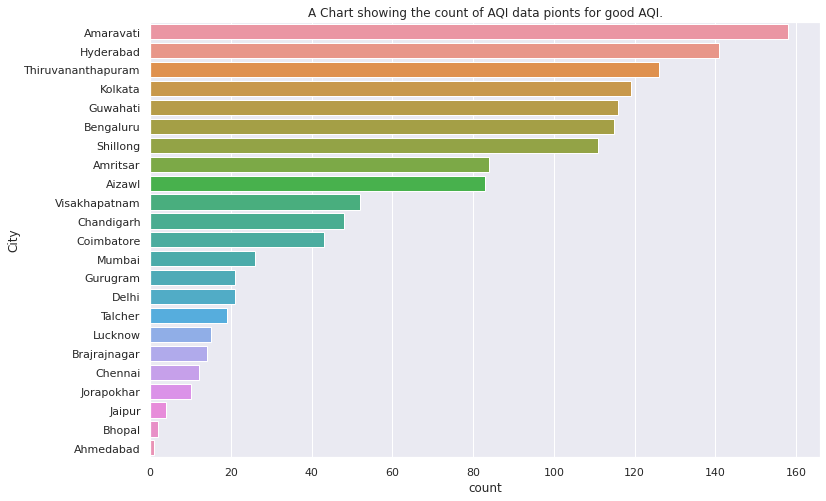

In [ ]:
# creating dataframe with only AQI_Bucket good
AQI_good_df =city_day_df[city_day_df['AQI_Bucket']=='Good'] 
# displaying the count of AQI pionts per city
sns.countplot(data=AQI_good_df, 
              y='City', 
              order = AQI_good_df['City'].value_counts().index
              ).set(title="A Chart showing the count of AQI data pionts for good AQI.");

From the chart its noted that the cities with the most good AQI data pionts are Amaravati, Hyderabad, Thiruvananthapuram, Kolkata, Guwahati, Shillong, Amritsar, Visakhapatnam, Chandigarth, Coimbatore, Mumbai, Gurugram, Delhi, Talcher, Lucknow, Brajrajnagar, Chennai, Jorapokhar, jaipur, Bhopai and lastly Ahmedabad in a descending order 

## Which year has had the best Air Quality on record?

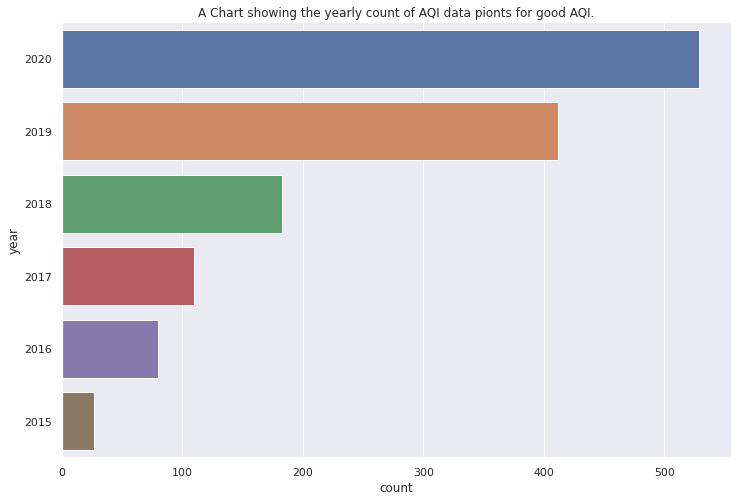

In [ ]:
# displaying the count of AQI pionts per year
sns.countplot(data=AQI_good_df, 
              y='year', 
              order = AQI_good_df['year'].value_counts().index
              ).set(title="A Chart showing the yearly count of AQI data pionts for good AQI.");

The charts shows that 2020 contributed the most data pionts to the good AQI_Bucket in the period of 2015 to 2020. Then followed by 2019, 2018, 2017, 2016 and with 2015 contributing the least. 

## Which month has had the best Air Quality in 2020?

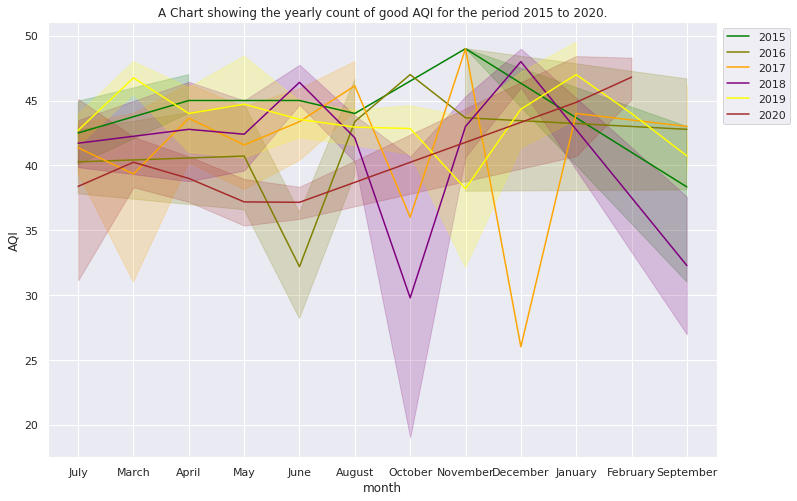

In [ ]:
# displaying the year trend of the changes in AQI magnitude per year
sns.lineplot(data= AQI_good_df, x='month', y='AQI', hue='year', palette={2015:'green', 
                                                                         2016:'olive', 
                                                                         2017:'orange', 
                                                                         2018:'purple', 
                                                                         2019:'yellow', 
                                                                         2020:'brown'}
             ).set(title="A Chart showing the yearly count of good AQI for the period 2015 to 2020.")
             
#place legend outside top right corner of plot             
plt.legend(bbox_to_anchor=(1, 1), loc='upper left');

From the chart we see that October, 2018 had the lowest piont of AQI with the second highest coming from December, 2017.

## Which City has the best Good AQI recorded?

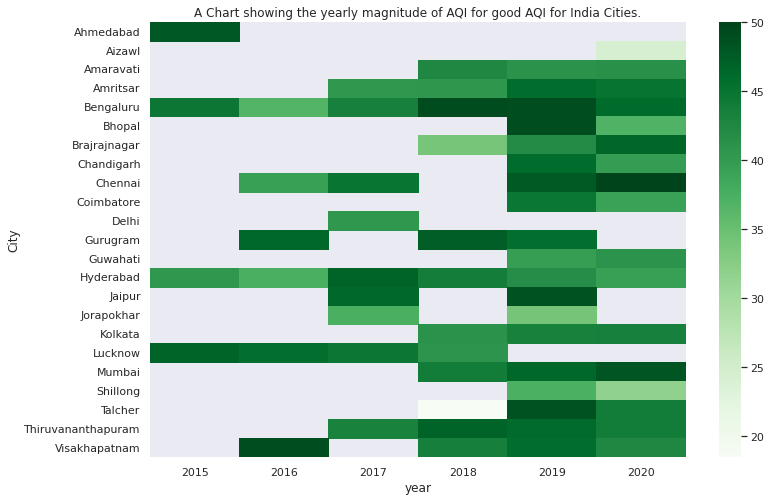

In [ ]:
# creating a dataframe with only data with AQI_BUcket severe
good_bucket_df = city_day_df[city_day_df['AQI_Bucket'] == 'Good']
# creating a pivot table of the magnitude of AQI values of cities per year
pivot_good_bucket = good_bucket_df.pivot_table(index='City', columns='year', values='AQI')
# displaying the results in a heatmap
sns.heatmap(pivot_good_bucket, cmap='Greens').set(title="A Chart showing the yearly magnitude of AQI for good AQI for India Cities."); 

>Talcher in 2018 had the lowest ever recorded values of AQI in a year.

> In 2020, Aizawl had the lowest values of AQI recorded.

## Which gaseous pollutant is most common in Air described as good?

In [ ]:
# getting the sums of the different columns of the pollutants
AQI_good_sum = AQI_good_df[['NOx', 'O3', 'SO2', 'NO2', 'NO', 'NH3', 'CO']].sum()
# creating a dataframe of the sums
AQI_good_sum_df = pd.DataFrame(data=AQI_good_sum, columns=['sum'])
# using plotly to display percentage distribution of the sums
fig_AQI_good_pie = px.pie(AQI_good_sum_df, values='sum', names= AQI_good_sum_df.index,
                          title = 'Percentage distribution of the sums of Pollutants in good Air'
                          )

fig_AQI_good_pie.update_layout(autosize=False,
                               width=1000,
                               height=500,
                               legend_title = 'Pollutants',
                               title_x=0.5
                               )

fig_AQI_good_pie

From the chart, the most common pollutant in good AQI is O3 followed by NOx, NO2, NH3, SO2, NO and then CO being the least common by magnitude composition. 

# Summary and Conclusion
Using analysis and visualisation tools in python we have explored the dataframe that contained data about the air quality of India's major cities.
Here are the outline's that we have followed:
1. Downloaded the dataset from Kaggle
2. Data preparation and cleaning was done with Pandas
3. Exploratory analysis and visualization was done along with asking and drawing insights inorder to answer the questions.

The following are the observations I have noticed during Exploratory Analysis:

1. India's Air Quality can generally be decribed as Moderate.
2. Over 60% of India's Air Quality is described a s Moderate or Satisfactory meaning at best it will cause minor breathing discomfort to sensitive people and at worst it will cause Lung and Heart diseases in children and older adults in most parts of India.
3. Very few stations in India's cities recorded their Air Quality as being Good. Infact Good had the 2nd lowest number of data pionts recorded.
4. Ahmedabad, Dehli, Patna, Lucknow, Gurugam, Talcher, Jorapokhar, Kolkata, Amritsar, Hyderabad, Chennai, Guwahati and Jaipur in descending order are the cities with the most places that have the worst Air Quality. Since they has the most data pionts that recorded their Air Quality as severe.
5. Amaravati, Hyderabad, Thiruvananthapuram, Kolkata, Guwahati, Bengaluru, Shillong, Amritsar, Aizawi, Visakhapatnam, Chandigarth, Mumbai, Gurugram, Delhi, Talcher, Lucknow, Brajrajnagar, Chennai, Jorapokhar, Jaipur, Bhopal and Ahmedabad in descending order are the cities with places that have the best Air Quality in India. Since they has the most data pionts that recorded their Air Quality as good.
5. 2018, 2019, 2016, 2017, 2015, and 2020 in descending order have the most records of severe Air Quality all across India's cities. This shows a slight decrease in extreme pollution levels, the trend drastically increased between 2020 and 2019 due to the covid-19 pandemic
6. 2020, 2019, 2018, 2017, 2016, and 2015 in descending order have the most records of good Air Quality all across India's cities. Due to the restrictions on economic activities in India, 2020 recorded record breaking number of good AQI. This was on top of the increasing trend of good AQI recorded between 2015 and 2019.
7. Most of the severe AQI is made up of nitrogenous gaseous pollutants. 
8. Most of the good AQI is made up of ozone is the most common pollutant.

# Recommendation
*  The dataframe has alot of missing values. An investigation on how it affects the trend of different AQI_Buckets between 2015 and 2020 can be carried out. This ccan be achieved by tring out different ways of handling NaN values
*  Findout which Cities have their AQI_Bucket are changing from severe to poor or severe to good or good to very poor.
* Investigate how the difference in the number of inputs contributed by city affects the categorisation of the AQI.

# References
* [Kaggle Dataset Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india 'Click for more info.')
* [Calculating AQI (Air Quality Index) Tutorial](https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial 'Click for more info.')
* [geeks for geeks](https://www.geeksforgeeks.org 'Click for more info.')
* [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html 'Click for more info.')
* [Scatter Plots in Python](https://plotly.com/python/line-and-scatter/ 'Click for more info.')
* [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html 'Click for more info.')
* [Violin Plots in Python](https://plotly.com/python/violin/ 'Click for more info.')
* [Exploratory Data Analysis](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/assignment/exploratory-data-analysis-project 'Click for more info.')
* [pandas documentation](https://pandas.pydata.org/docs/index.html 'Click for more info.')
* [Matplotlib gallery](https://matplotlib.org/3.1.1/gallery/index.html 'Click for more info.')
* [Exploratory Data Analysis of India's Weather And Its Impact On Renewable Energy](https://jovian.ai/prasanthi-vvit/final-eda-project#C0 'Click for more info.')
* [stackoverflow](https://stackoverflow.com 'Click for more info.')
* [How to Change the Position of a Legend in Seaborn](https://www.statology.org/seaborn-legend-position/)
    